In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.ensemble import RandomForestClassifier as rfc

In [2]:
df = pd.read_csv("Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.shape

(150, 6)

In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [8]:
pd.DataFrame(df.groupby('Species').agg("count"))

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,50,50,50,50
Iris-versicolor,50,50,50,50,50
Iris-virginica,50,50,50,50,50


<AxesSubplot:>

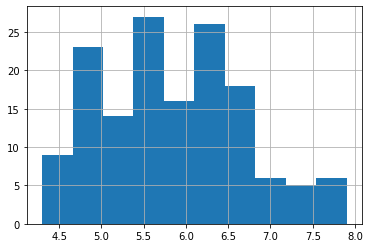

In [9]:
df['SepalLengthCm'].hist()

In [10]:
correlation = df.corr()

<AxesSubplot:>

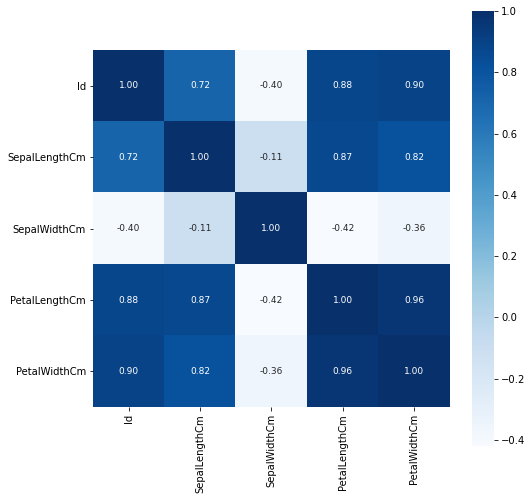

In [11]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation,cmap = 'Blues',cbar = True,square = True,fmt = '.2f',annot = True,annot_kws = {'size':9})

In [12]:
from sklearn.neighbors import KNeighborsClassifier as knn

In [13]:
model  = knn()

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
df["Species"] = le.fit_transform(df['Species'])

In [18]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [19]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2
149,150,5.9,3.0,5.1,1.8,2


In [21]:
X = df.drop(columns = ['Id','SepalWidthCm','Species'],axis = 1)
Y =  df['Species']

In [22]:
print(X)

     SepalLengthCm  PetalLengthCm  PetalWidthCm
0              5.1            1.4           0.2
1              4.9            1.4           0.2
2              4.7            1.3           0.2
3              4.6            1.5           0.2
4              5.0            1.4           0.2
..             ...            ...           ...
145            6.7            5.2           2.3
146            6.3            5.0           1.9
147            6.5            5.2           2.0
148            6.2            5.4           2.3
149            5.9            5.1           1.8

[150 rows x 3 columns]


In [23]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32


In [24]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state = 2)

In [25]:
X_train.head()

,SepalLengthCm,PetalLengthCm,PetalWidthCm
134,6.1,5.6,1.4
28,5.2,1.4,0.2
65,6.7,4.4,1.4
0,5.1,1.4,0.2
27,5.2,1.5,0.2


In [26]:
model = GaussianNB()

In [27]:
model.fit(X_train,Y_train)

GaussianNB()

In [28]:
y_prd1 = model.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
print(accuracy_score(y_prd1,Y_test))

0.9777777777777777


In [ ]:
y_prd = model.predict(x_train)

In [ ]:
print(accuracy_score(y_prd,y_train))

In [32]:
model.score(X_test, Y_test)

0.9777777777777777

In [33]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [34]:
model.fit(X_train,Y_train)

KNeighborsClassifier()

In [35]:
y_prd = model.predict(X_train)

In [36]:
print(accuracy_score(y_prd,Y_train))

0.9619047619047619
